In [2]:
import tensorflow as tf
import random
import matplotlib.pyplot as plt
import cv2 as cv 
import os
import sklearn.metrics as sk
import numpy as np
import tensorflow_addons as tfa 
from keras.applications.vgg16 import preprocess_input

angry


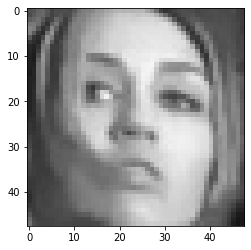

disgust


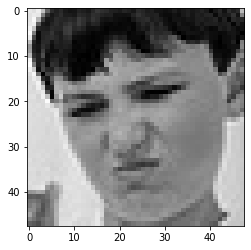

fear


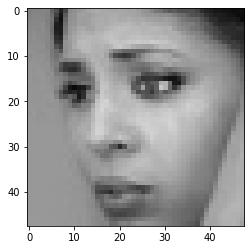

happy


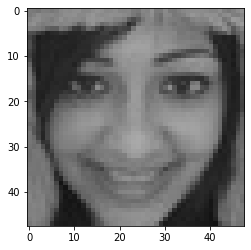

neutral


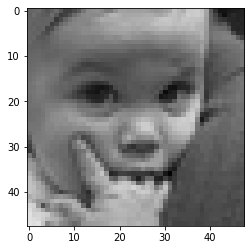

sad


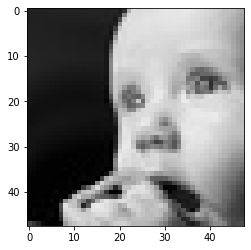

surprise


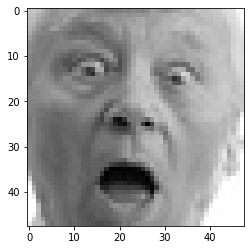

In [3]:
class_names = ['angry', 'disgust', 'fear', 'happy', 'neutral','sad', 'surprise']
path = r'D:/Simplilearn/Projects/PC AIML - Advanced Deep Learning and Computer Vision/data/test/{}/test_{}_{}.jpg'
for c in class_names:
    index = random.randint(1, 100)
    plt.imshow(cv.imread(path.format(c,c,index)))
    print(c)
    plt.show()


In [4]:
class_counts = []
counTrain = 0
counTest = 0
trainDir = r'D:/Simplilearn/Projects/PC AIML - Advanced Deep Learning and Computer Vision/data/train/{}/'
testDir = r'D:/Simplilearn/Projects/PC AIML - Advanced Deep Learning and Computer Vision/data/test/{}/'
for c in class_names:
    for path in os.listdir(trainDir.format(c)):
    # check if current path is a file
        if os.path.isfile(os.path.join(trainDir.format(c), path)):
            counTrain += 1
    for path in os.listdir(testDir.format(c)):
    # check if current path is a file
        if os.path.isfile(os.path.join(testDir.format(c), path)):
            counTest += 1
    class_counts.append([counTrain,counTest])
    counTrain = 0
    counTest = 0

    

In [12]:
class_counts

[[3992, 960],
 [436, 111],
 [4103, 1018],
 [7164, 1825],
 [4982, 1216],
 [4938, 1139],
 [3205, 797]]

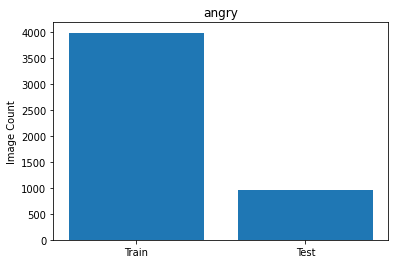

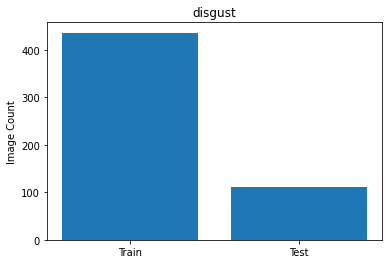

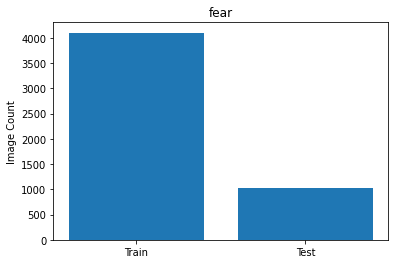

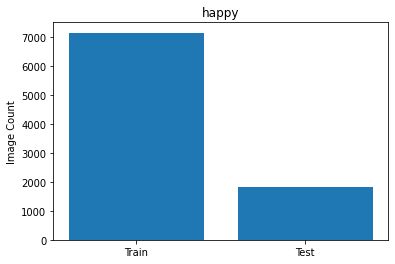

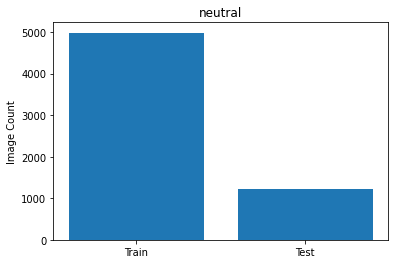

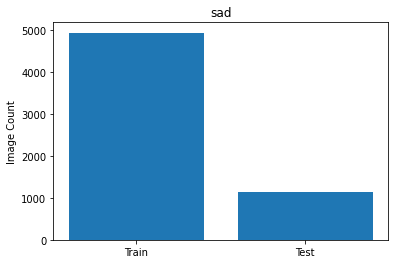

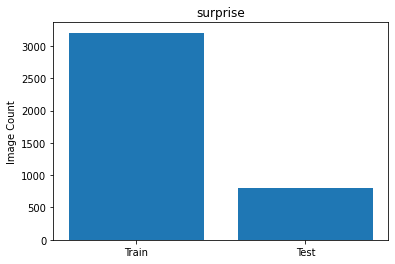

In [13]:
barLabels = ['Train', 'Test']
for emotion in range(len(class_names)):
    plt.title(class_names[emotion])
    plt.bar(barLabels,class_counts[emotion])
    plt.ylabel('Image Count')
    plt.show()

In [11]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(shear_range = 0.2,zoom_range = 0.2,horizontal_flip = True,rescale= 1./255)
training_set = train_datagen.flow_from_directory(
    r'D:/Simplilearn/Projects/PC AIML - Advanced Deep Learning and Computer Vision/data/train/',
    target_size = (48, 48),
    color_mode='grayscale',
    batch_size = 32,
    class_mode = 'categorical')


test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(shear_range = 0.2,zoom_range = 0.2,horizontal_flip = True)
testing_set = train_datagen.flow_from_directory(
    r'D:/Simplilearn/Projects/PC AIML - Advanced Deep Learning and Computer Vision/data/test/',
    target_size = (48, 48),
    color_mode='grayscale',
    batch_size = 32,
    class_mode = 'categorical')


Found 28820 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


#1.CNN Architecture

Model building

In [38]:
cnn = tf.keras.models.Sequential()

cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu',input_shape=[48,48,1]))
cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Dropout(0.1))


cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Dropout(0.1))


cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
cnn.add(tf.keras.layers.Dense(7, activation='softmax'))

f1 = tfa.metrics.F1Score(num_classes=7, threshold=0.5)
cnn.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(), 
    optimizer='adam',
    metrics=['accuracy',tf.keras.metrics.Recall(thresholds=0.5,name='recall'),tf.keras.metrics.Precision(name='percision'),f1])

Model Training 

In [39]:
hist = cnn.fit(
    training_set,
    steps_per_epoch=len(training_set),
    epochs=10,
    validation_data=testing_set,
    validation_steps = len(testing_set),
    callbacks=[tf.keras.callbacks.EarlyStopping(patience=2)])

Epoch 1/10
901/901 [==============================] - 64s 70ms/step - loss: 1.6886 - accuracy: 0.3399 - recall: 0.1013 - percision: 0.6246 - f1_score: 0.1089 - val_loss: 1.5767 - val_accuracy: 0.3834 - val_recall: 0.1374 - val_percision: 0.7533 - val_f1_score: 0.1464
Epoch 2/10
901/901 [==============================] - 65s 72ms/step - loss: 1.4915 - accuracy: 0.4205 - recall: 0.1909 - percision: 0.7045 - f1_score: 0.1907 - val_loss: 1.5148 - val_accuracy: 0.4158 - val_recall: 0.1489 - val_percision: 0.7377 - val_f1_score: 0.1686
Epoch 3/10
901/901 [==============================] - 69s 76ms/step - loss: 1.4125 - accuracy: 0.4527 - recall: 0.2284 - percision: 0.7191 - f1_score: 0.2274 - val_loss: 1.4246 - val_accuracy: 0.4451 - val_recall: 0.2380 - val_percision: 0.7097 - val_f1_score: 0.2271
Epoch 4/10
901/901 [==============================] - 66s 73ms/step - loss: 1.3540 - accuracy: 0.4770 - recall: 0.2603 - percision: 0.7211 - f1_score: 0.2644 - val_loss: 1.4158 - val_accuracy: 0.4

Model assessment

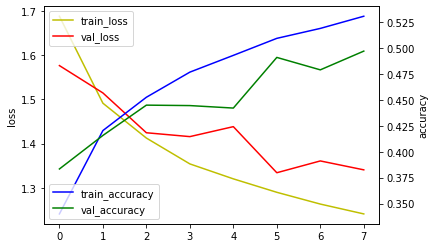

In [40]:
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history["loss"], "y", label = "train_loss")
loss_ax.plot(hist.history["val_loss"], "r", label = "val_loss")

acc_ax.plot(hist.history["accuracy"], "b", label="train_accuracy")
acc_ax.plot(hist.history["val_accuracy"], "g", label="val_accuracy")

loss_ax.set_ylabel("loss")
acc_ax.set_ylabel("accuracy")

loss_ax.legend(loc = "upper left")
acc_ax.legend(loc = "lower left")

plt.show()

#2. Customized CNN Architecture

In [41]:
training_set = train_datagen.flow_from_directory(
    r'D:/Simplilearn/Projects/PC AIML - Advanced Deep Learning and Computer Vision/data/train/',
    target_size = (48, 48),
    color_mode='grayscale',
    batch_size = 64,
    class_mode = 'categorical')

testing_set = train_datagen.flow_from_directory(
    r'D:/Simplilearn/Projects/PC AIML - Advanced Deep Learning and Computer Vision/data/test/',
    target_size = (48, 48),
    color_mode='grayscale',
    batch_size = 64,
    class_mode = 'categorical')

Found 28820 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


Model building

In [44]:
cnn1 = tf.keras.models.Sequential()

cnn1.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='sigmoid',input_shape=[48,48,1]))
cnn1.add(tf.keras.layers.BatchNormalization())
cnn1.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn1.add(tf.keras.layers.Dropout(0.1))


cnn1.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='sigmoid'))
cnn1.add(tf.keras.layers.BatchNormalization())
cnn1.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn1.add(tf.keras.layers.Dropout(0.1))


cnn1.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='sigmoid'))
cnn1.add(tf.keras.layers.BatchNormalization())
cnn1.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn1.add(tf.keras.layers.Dropout(0.1))


cnn1.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='sigmoid'))
cnn1.add(tf.keras.layers.BatchNormalization())
cnn1.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn1.add(tf.keras.layers.Dropout(0.1))


cnn1.add(tf.keras.layers.Flatten())
cnn1.add(tf.keras.layers.Dense(units=128, activation='sigmoid'))
cnn1.add(tf.keras.layers.Dense(7, activation='softmax'))

cnn1.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(), 
    optimizer='rmsprop', 
    metrics=['accuracy',tf.keras.metrics.Recall(thresholds=0.5,name='recall'),tf.keras.metrics.Precision(name='percision'),f1])

Model Training

In [45]:
hist1 = cnn1.fit(
    training_set,
    steps_per_epoch=len(training_set),
    epochs=10,
    validation_data=testing_set,
    validation_steps = len(testing_set),
    callbacks=[tf.keras.callbacks.EarlyStopping(patience=2)])

Epoch 1/10
451/451 [==============================] - 57s 123ms/step - loss: 1.6060 - accuracy: 0.3656 - recall: 0.1110 - percision: 0.6571 - f1_score: 0.1670 - val_loss: 1.5251 - val_accuracy: 0.4114 - val_recall: 0.0999 - val_percision: 0.8277 - val_f1_score: 0.1252
Epoch 2/10
451/451 [==============================] - 55s 121ms/step - loss: 1.4711 - accuracy: 0.4304 - recall: 0.1926 - percision: 0.6926 - f1_score: 0.1918 - val_loss: 1.4347 - val_accuracy: 0.4509 - val_recall: 0.2557 - val_percision: 0.6852 - val_f1_score: 0.2340
Epoch 3/10
451/451 [==============================] - 52s 114ms/step - loss: 1.4133 - accuracy: 0.4558 - recall: 0.2216 - percision: 0.6991 - f1_score: 0.2212 - val_loss: 1.5698 - val_accuracy: 0.3943 - val_recall: 0.1775 - val_percision: 0.5500 - val_f1_score: 0.1650
Epoch 4/10
451/451 [==============================] - 52s 116ms/step - loss: 1.3782 - accuracy: 0.4689 - recall: 0.2415 - percision: 0.7058 - f1_score: 0.2432 - val_loss: 1.3941 - val_accuracy:

Model Assessment

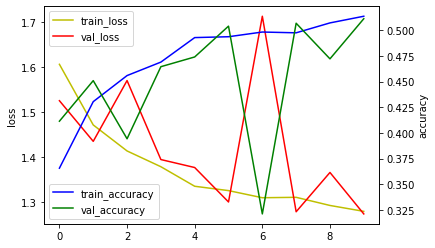

In [46]:
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist1.history["loss"], "y", label = "train_loss")
loss_ax.plot(hist1.history["val_loss"], "r", label = "val_loss")

acc_ax.plot(hist1.history["accuracy"], "b", label="train_accuracy")
acc_ax.plot(hist1.history["val_accuracy"], "g", label="val_accuracy")

loss_ax.set_ylabel("loss")
acc_ax.set_ylabel("accuracy")

loss_ax.legend(loc = "upper left")
acc_ax.legend(loc = "lower left")

plt.show()

#3. Transfer Learning

Model building

In [6]:
training_set = train_datagen.flow_from_directory(
    r'D:/Simplilearn/Projects/PC AIML - Advanced Deep Learning and Computer Vision/data/train/',
    target_size = (48, 48),
    color_mode='rgb',
    batch_size = 32,
    class_mode = 'categorical')

testing_set = train_datagen.flow_from_directory(
    r'D:/Simplilearn/Projects/PC AIML - Advanced Deep Learning and Computer Vision/data/test/',
    target_size = (48, 48),
    color_mode='rgb',
    batch_size = 32,
    class_mode = 'categorical')

Found 28820 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [7]:
PretrainedModel = tf.keras.applications.vgg16.VGG16(include_top=False, input_tensor=tf.keras.layers.Input(shape=(48, 48, 3)))
for layer in PretrainedModel.layers:
 layer.trainable = False
flat1 = tf.keras.layers.Flatten()(PretrainedModel.layers[-1].output)
class1 = tf.keras.layers.Dense(64, activation='relu')(flat1,training=True)
dropout1 = tf.keras.layers.Dropout(0.1)(class1)
output = tf.keras.layers.Dense(7, activation='softmax')(dropout1,training=True)
cnn2 = tf.keras.Model(inputs=PretrainedModel.inputs, outputs=output)

94765736/94765736 [==============================] - 7s 0us/step


Model Training

In [9]:
f1 = tfa.metrics.F1Score(num_classes=7, threshold=0.5)

In [ ]:
cnn2.compile(optimizer=tf.keras.optimizers.Adam(),loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy',tf.keras.metrics.Recall(thresholds=0.5,name='recall'),tf.keras.metrics.Precision(name='percision'),f1])
hist2 = cnn2.fit(
    training_set, 
    epochs=15, 
    callbacks=[tf.keras.callbacks.EarlyStopping(patience=2)], 
    validation_data=testing_set)

Model Assessment

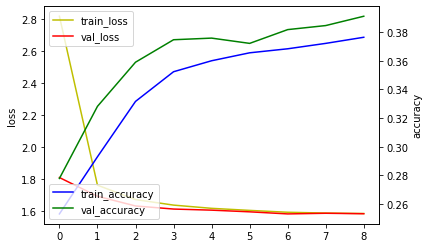

In [72]:
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist2.history["loss"], "y", label = "train_loss")
loss_ax.plot(hist2.history["val_loss"], "r", label = "val_loss")

acc_ax.plot(hist2.history["accuracy"], "b", label="train_accuracy")
acc_ax.plot(hist2.history["val_accuracy"], "g", label="val_accuracy")

loss_ax.set_ylabel("loss")
acc_ax.set_ylabel("accuracy")

loss_ax.legend(loc = "upper left")
acc_ax.legend(loc = "lower left")

plt.show()

#4. Comparing the models

In [83]:
print('Model\t\tAccuracy\t\tPercision\t\t\tRecall\n1st CNN\t\t{}\t\t{}\t\t{}\n2nd CNN\t\t{}\t\t{}\t\t{}\n3rd CNN\t\t{}\t\t{}\t\t{}\n'.format(
    hist.history['val_accuracy'][-1],
    hist.history['percision'][-1],
    hist.history['recall'][-1],

    hist1.history['val_accuracy'][-1],
    hist1.history['percision'][-1],
    hist1.history['recall'][-1],
    

    hist2.history['val_accuracy'][-1],
    hist2.history['percision'][-1],
    hist2.history['recall'][-1],
))

Model		Accuracy		Percision			Recall
1st CNN		0.4973110556602478		0.7306568026542664		0.3296321928501129
2nd CNN		0.5111802816390991		0.7213236689567566		0.3032963275909424
3rd CNN		0.3911689817905426		0.6474347114562988		0.11953504383563995



In [94]:
print('F1 scores of models in sequential order (1st,2nd,3rd):\n\n{}\n\n{}\n\n{}'.format(
    hist.history['f1_score'][-1],
    hist1.history['f1_score'][-1],
    hist2.history['f1_score'][-1]))

F1 scores of models in sequential order (1st,2nd,3rd):

[0.27942324 0.12396694 0.12551753 0.7336606  0.36242002 0.24200767
 0.6166269 ]

[0.26522592 0.00911162 0.0568632  0.7201909  0.33142856 0.17524719
 0.5956586 ]

[0.0109127  0.         0.01630696 0.4135078  0.10210431 0.05589586
 0.36877826]


# 5.Things to improve the model(s)
a. increase the number of epochs: the growth in accuracy has not saturated by the 10th epoch in the second model (the most accurate)
b. Apply more Regularization Techniques (L2)
c. Increase the learning rate: it might risk oscillation, but it will improve the speed of the model by quite an extent